In [1]:
#importing the libraries that are needed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 

In [7]:
#data set and filtering
data = pd.read_csv("spam.csv", encoding="latin-1") # reading data
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1':'label', 'v2':'Text'})
data['label_in_num'] = data['label'].map({'ham':0,'spam':1})
data.head(11) #shows the preview of the dataset

,label,Text,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [8]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [9]:
df.head(11)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1':'label', 'v2':'Text'})
df['label_in_num'] = df['label'].map({'ham':0,'spam':1})
df.head(11)

,label,Text,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


<AxesSubplot:xlabel='label', ylabel='count'>

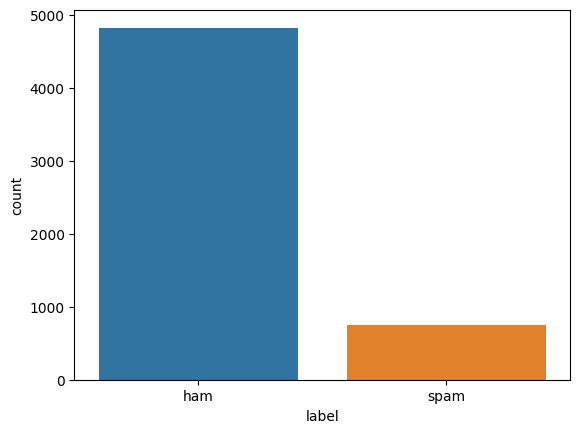

In [11]:
sns.countplot(x=df['label'])

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 0, 'Text length')

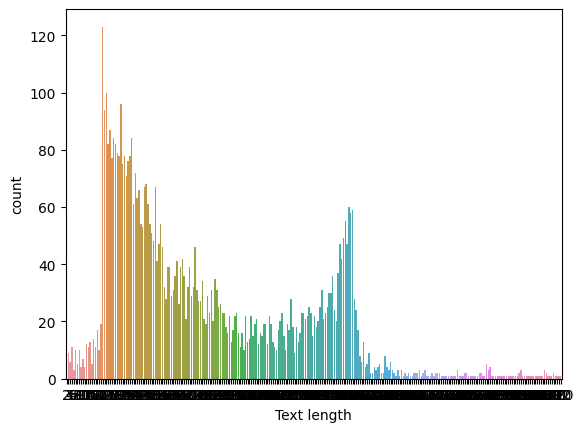

In [13]:
sns.countplot(x=[len(df.loc[i]['Text']) for i in range(len(df))])
plt.xlabel('Text length')

In [15]:
text_words_lengths = [len(df.loc[i]['Text'].split()) for i in range(0, len(df))]
total_length = np.sum(text_words_lengths)
text_words_mean = int(np.mean(text_words_lengths))
print('we have ' + str(total_length) + ' words in our Dataframe')
print('the average word count in every scentence is ' + str(text_words_mean))
text_words_lengths[:11], total_length, text_words_mean

we have 86335 words in our Dataframe
the average word count in every scentence is 15


([20, 6, 28, 11, 13, 32, 16, 26, 26, 29, 21], 86335, 15)

In [44]:
#Setting the data for the training

from sklearn.model_selection import train_test_split

X, y = np.asanyarray(data['Text']), np.asanyarray(data['label_in_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
len(X_train), len(X_test), X_train[:2], y_train[:2]

(4457,
 1115,
 array(['K. Did you call me just now ah? ',
        '\\Hi its Kate it was lovely to see you tonight and ill phone you tomorrow. I got to sing and a guy gave me his card! xxx\\""'],
       dtype=object),
 array([0, 0], dtype=int64))

In [41]:
#2nd time setting the data for the training

from sklearn.model_selection import train_test_split

X, y = np.asanyarray(data['Text']), np.asanyarray(data['label_in_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
len(X_train), len(X_test), X_train[:4], y_train[:4]

(4457,
 1115,
 array(['CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA',
        'Nothing. I meant that once the money enters your account here, the bank will remove its flat rate. Someone transfered  &lt;#&gt;  to my account and  &lt;#&gt; dollars got removed. So the banks differ and charges also differ.be sure you trust the 9ja person you are sending account details to cos...',
        'K.:)do it at evening da:)urgent:)',
        "Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched..."],
       dtype=object),
 array([1, 0, 0, 0], dtype=int64))

In [31]:
#Preparing the data
MAXTOKENS = total_length
OUTPUTLEN = text_words_mean

text_vec = layers.TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)

text_vec.adapt(X_train)

embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

# Input layer
input_layer = layers.Input(shape=(1,), dtype=tf.string)
# Text Vectorizatino layer
vec_layer = text_vec(input_layer)
# Embedding layer
embedding_layer_model = embedding_layer(vec_layer)
# Global Average Pooling layer
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
# Flatten layer for Dense layers
x = layers.Flatten()(x)
# 32 units dense layer
x = layers.Dense(32, activation='relu')(x)
# output layer with sigmoid activation function
output_layer = layers.Dense(1, activation='sigmoid')(x)
# final model
model = keras.Model(input_layer, output_layer)

In [32]:
#COMPILING
model.compile(optimizer=keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),
               metrics=['accuracy'])

In [35]:
#TRAINING
history = model.fit(X_train,
           y_train,
           epochs=30,
           batch_size=510,
           validation_data=(X_test, y_test),
           validation_steps=int(0.2 * len(X_test)))

Epoch 1/30
9/9 [==============================] - 2s 183ms/step - loss: 0.6809 - accuracy: 0.8084 - val_loss: 0.6636 - val_accuracy: 0.8807
Epoch 2/30
9/9 [==============================] - 1s 155ms/step - loss: 0.6516 - accuracy: 0.8647
Epoch 3/30
9/9 [==============================] - 1s 154ms/step - loss: 0.6234 - accuracy: 0.8719
Epoch 4/30
9/9 [==============================] - 1s 157ms/step - loss: 0.6014 - accuracy: 0.8912
Epoch 5/30
9/9 [==============================] - 1s 163ms/step - loss: 0.5905 - accuracy: 0.9192
Epoch 6/30
9/9 [==============================] - 1s 155ms/step - loss: 0.5849 - accuracy: 0.9542
Epoch 7/30
9/9 [==============================] - 1s 154ms/step - loss: 0.5788 - accuracy: 0.9722
Epoch 8/30
9/9 [==============================] - 1s 156ms/step - loss: 0.5739 - accuracy: 0.9829
Epoch 9/30
9/9 [==============================] - 1s 154ms/step - loss: 0.5706 - accuracy: 0.9865
Epoch 10/30
9/9 [==============================] - 1s 155ms/step - loss: 0.5

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec, X_test_vec = tfidf_vec.transform(X_train), tfidf_vec.transform(X_test)
baseline_model = RandomForestClassifier(n_estimators=250)
baseline_model.fit(X_train_vec, y_train)

random_forest_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(classification_report(y_test, baseline_model.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.87      0.93       133

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115



C:\Users\Pizarra_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


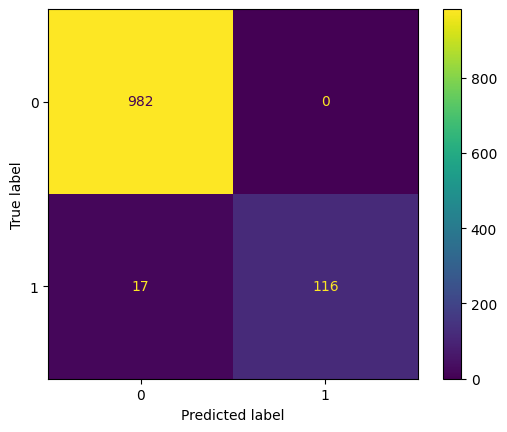

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(baseline_model, X_test_vec, y_test)

In [38]:
#TESTING OF FINAL ACCURACY AND LOSS 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Loss {:.4f}".format(loss))

Testing Accuracy 0.9910
Testing Loss 0.5697
